In [15]:
from stesml.model_tools import train_and_validate_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import get_dataframe
from stesml.plot_tools import plot_results
from stesml.plot_tools import plot_average_error

from stesml.stes_model import stes_model

In [29]:
data_dir = "../data/Sulfur_Models/heating/heating_all"
model_type = 'RandomForest' # Options: NN, XGBoost, RandomForest
features = ["flow-time", "Tw", "Ti"]
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
n_repeats = 1 # Number of times to repeat 5-fold CV. Each repeat gives a different shuffle.
split_test_data = False # Split data into train (64%), val (16%), and test (20%) (True) or just train (80%) and val (20%) (False)
t_max = -1
truncated = False

In [30]:
parameters = stes_model.get_parameters(model_type, truncated)

In [31]:
result, addenda = train_and_validate_model(data_dir, model_type, target, metric, scale, parameters, n_repeats, t_max=t_max, split_test_data=split_test_data)

Split #0, This Result: 7.2979, Average Result: 7.2979
Split #1, This Result: 5.0144, Average Result: 6.1562
Split #2, This Result: 9.9459, Average Result: 7.4194
Split #3, This Result: 3.9330, Average Result: 6.5478
Split #4, This Result: 6.4314, Average Result: 6.5245


In [32]:
# Choose the model (indexed by split number) from which you would like to see results
chosen_model = 3
# Get the addendum of the chosen model
addendum = addenda[chosen_model]

In [33]:
y_val = addendum['y_val']
y_hat = addendum['y_hat']
scenario_index = addendum['scenario_index']
train_index = addendum['train_index']
val_index = addendum['val_index']

In [34]:
val_df = get_dataframe(scenario_index, val_index, t_max=t_max)

In [35]:
val_df[target+"_hat"] = y_hat

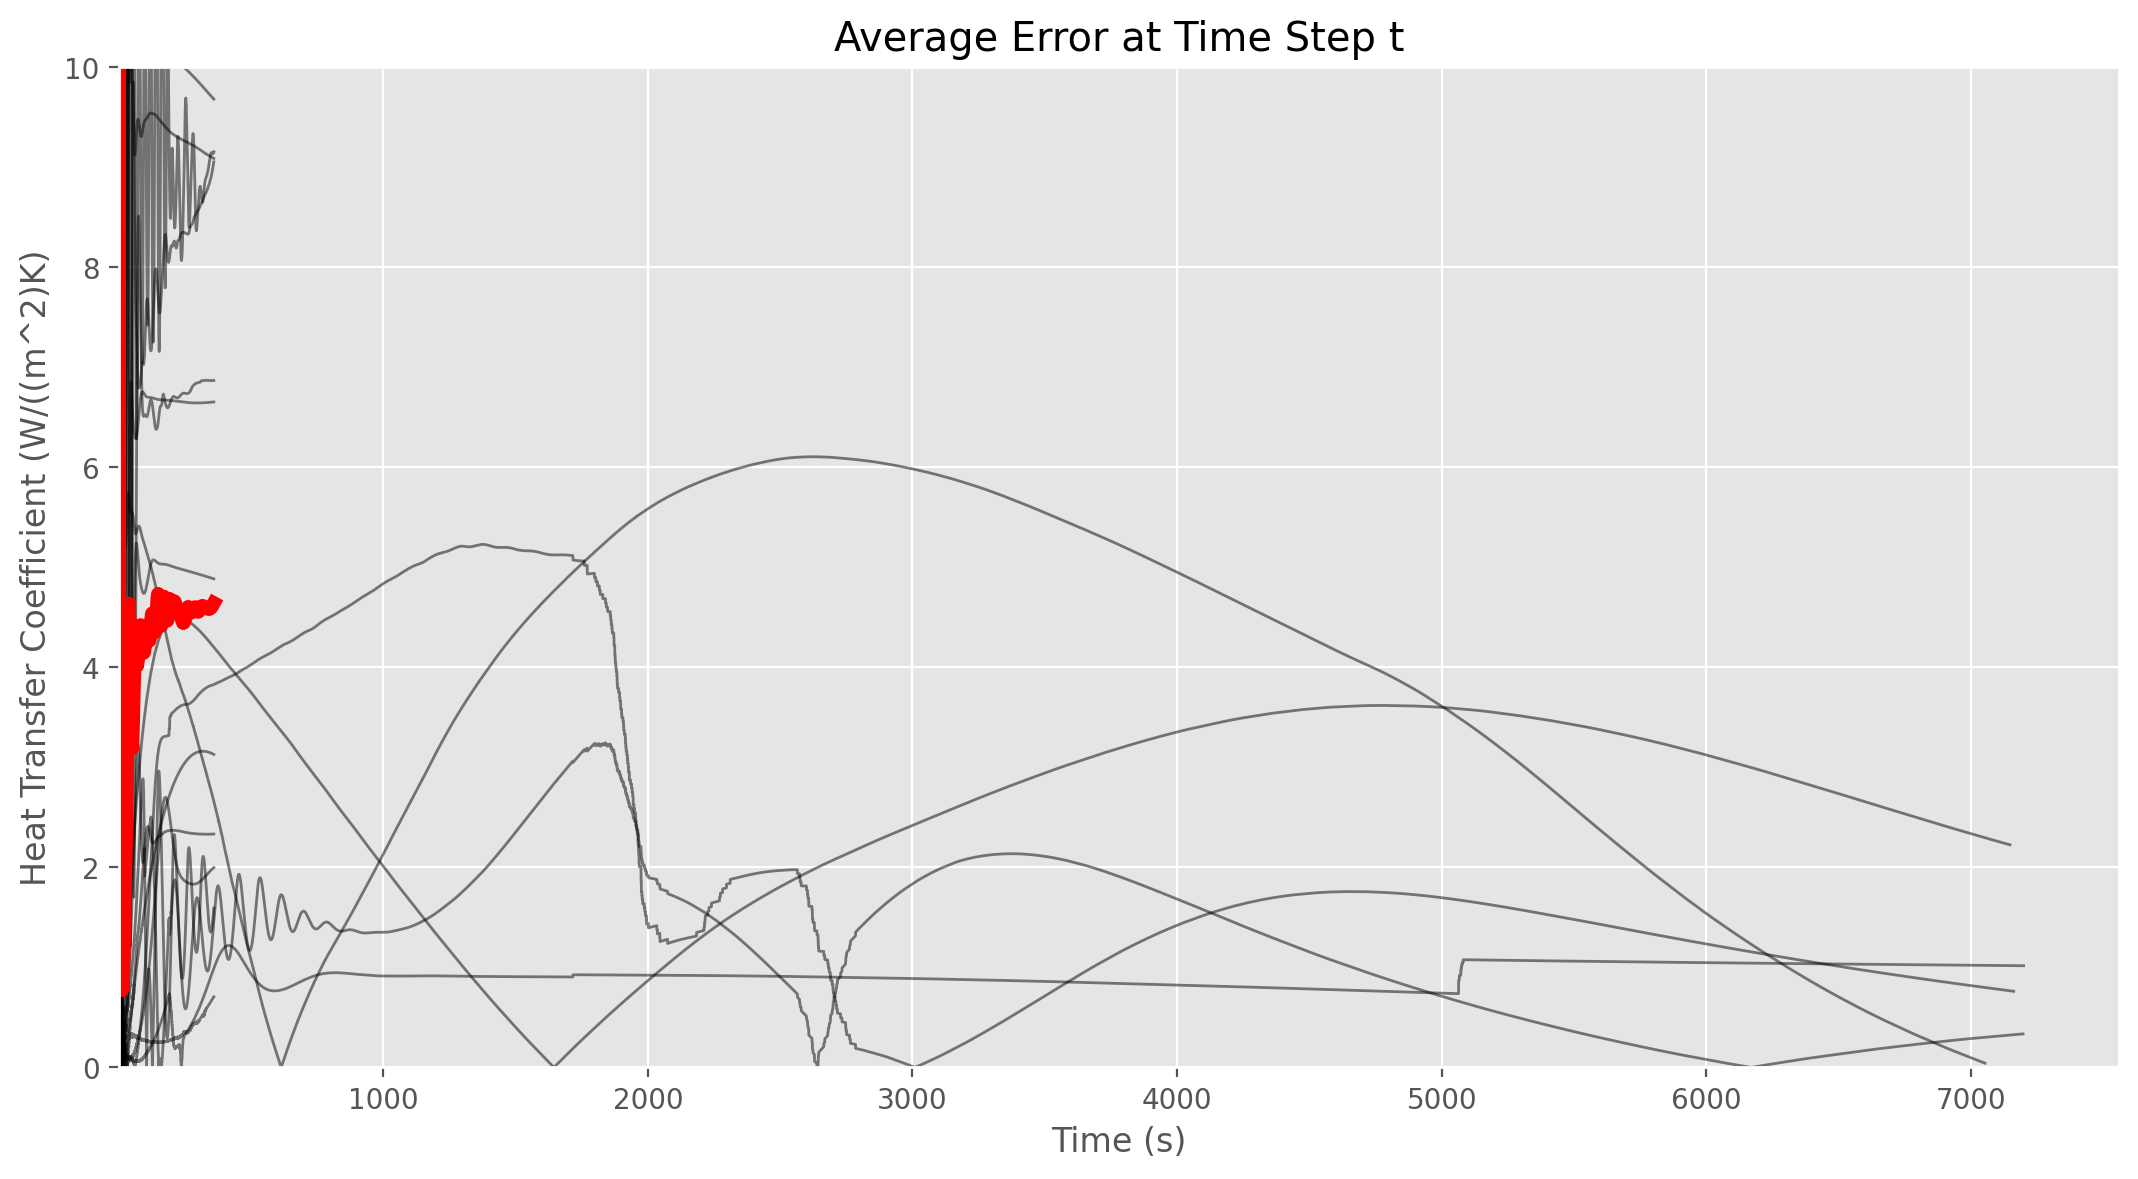

In [36]:
avg_error = plot_average_error(val_df, target=target)

<AxesSubplot:>

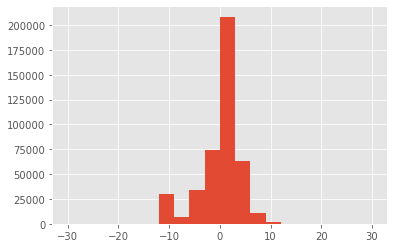

In [37]:
(val_df[target] - val_df[target+'_hat']).hist(bins=20, range=(-30, 30))

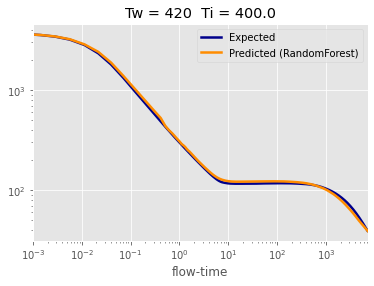

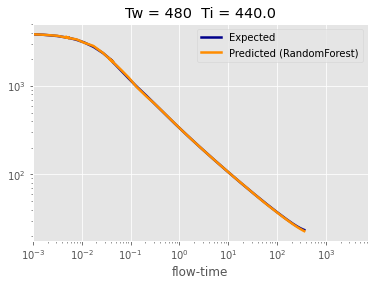

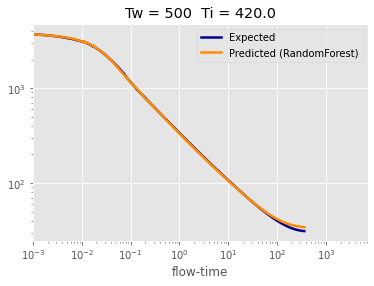

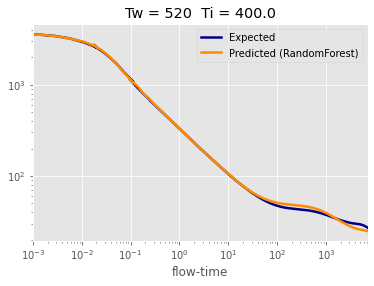

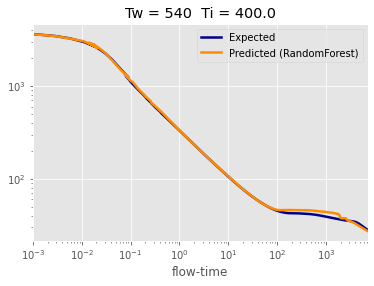

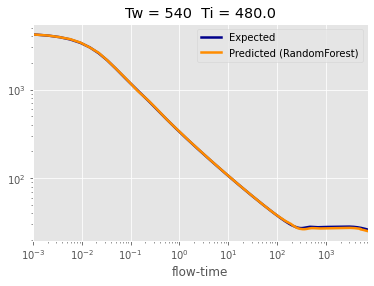

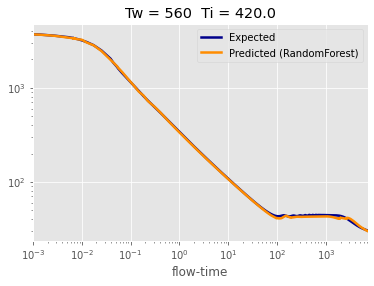

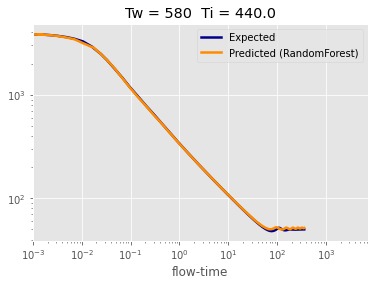

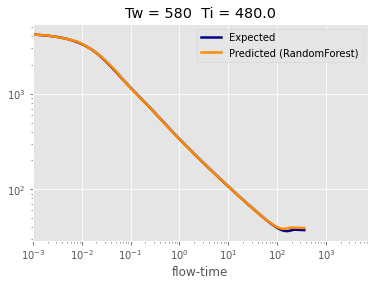

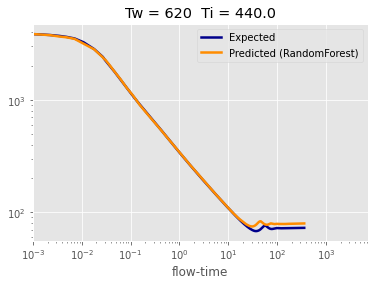

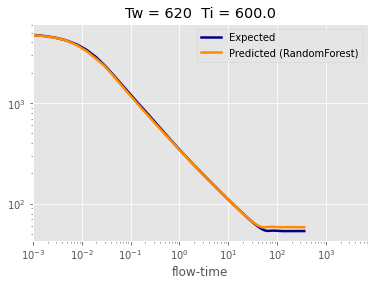

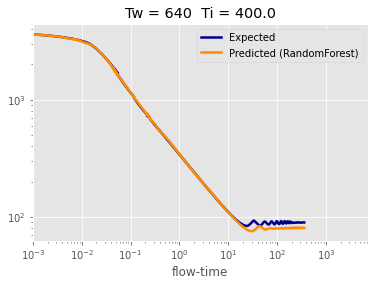

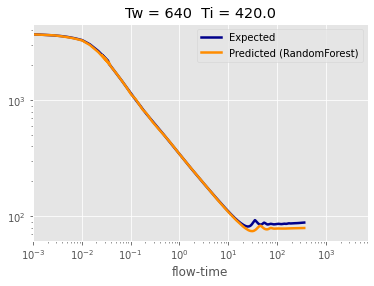

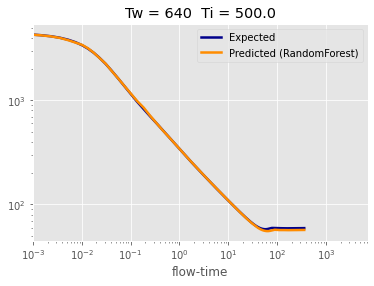

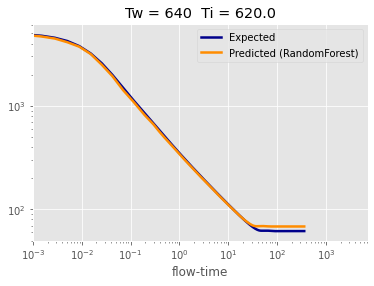

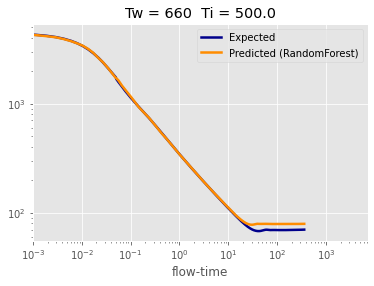

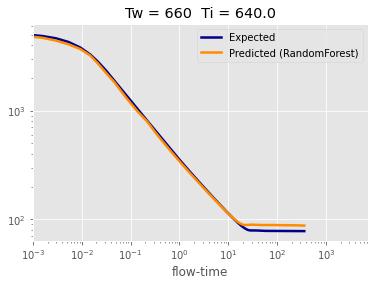

In [38]:
plot_results(val_df, model_type, target)

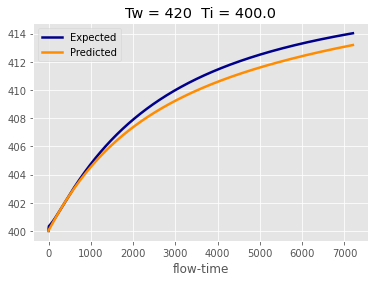

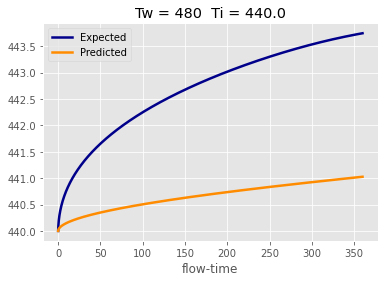

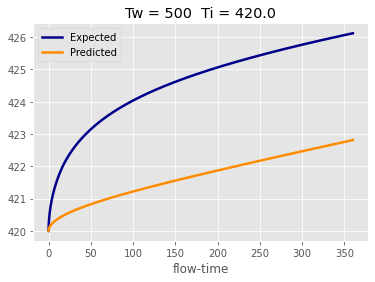

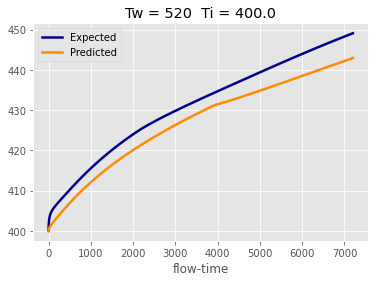

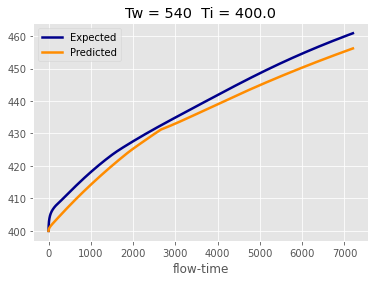

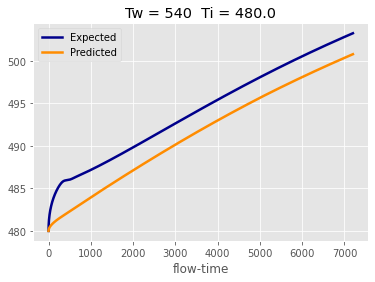

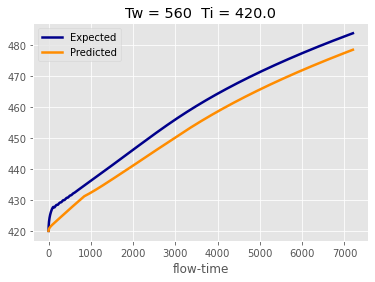

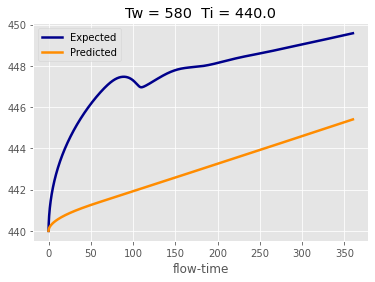

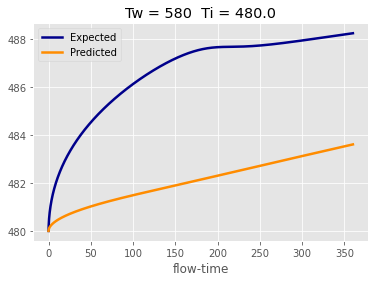

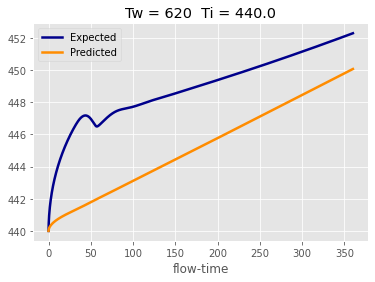

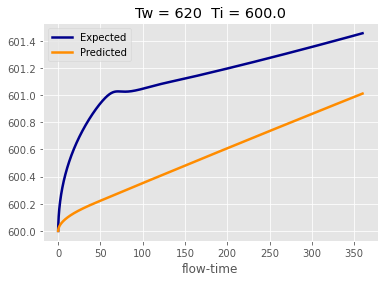

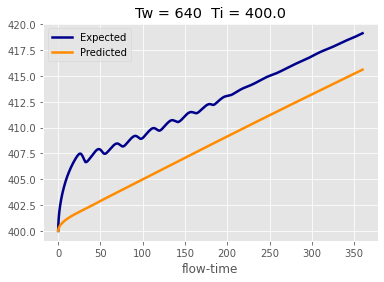

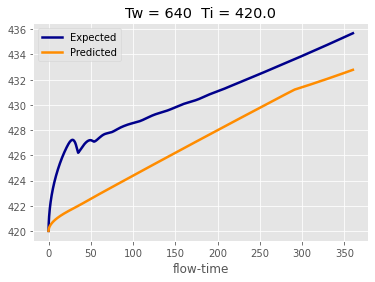

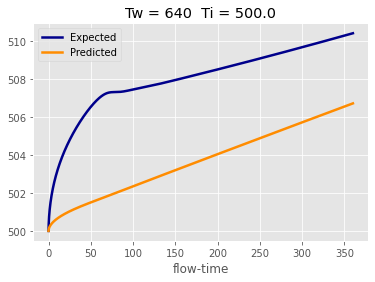

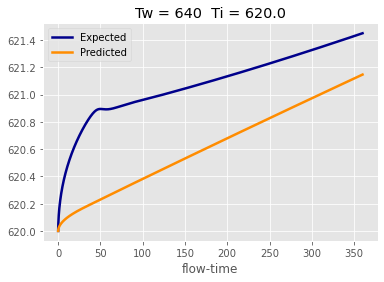

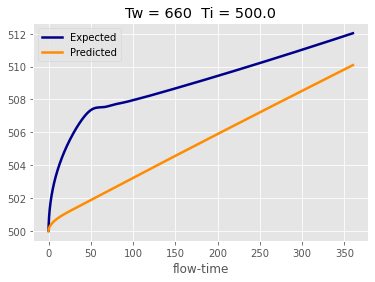

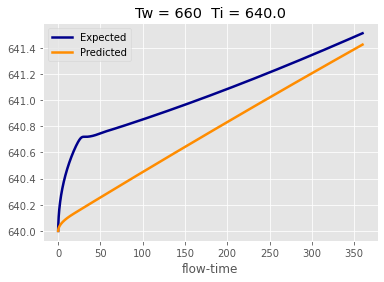

In [39]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(val_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(val_df, plot=True)

In [40]:
print(rmse)

3.5468074379157932


In [41]:
print(r2)

0.9932014195510431
